In [11]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from solver import CaptioningSolver
from model import CaptionGenerator
from coco_utils import load_coco_data, decode_captions

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)  # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
small_data = load_coco_data('small_data.pkl')
word_to_idx = small_data['word_to_idx']

train_image_filename <type 'numpy.ndarray'> (82783,) <U31
idx_to_word <type 'dict'> 1259
train_captions <type 'numpy.ndarray'> (100, 17) int32
train_image_idxs <type 'numpy.ndarray'> (100,) int32
train_features <type 'numpy.ndarray'> (100, 196, 512) float64
word_to_idx <type 'dict'> 1259


In [13]:
model = CaptionGenerator(word_to_idx, batch_size= 10, dim_feature=[196, 512], dim_embed=128,
                                   dim_hidden=128, n_time_step=16, cell_type='rnn', dtype=tf.float32)

In [14]:
solver = CaptioningSolver(model, small_data, n_epochs=100, batch_size=10, update_rule='adam',
                                      learning_rate=0.004, print_every=10, save_every=100,
                                pretrained_model=None, model_path='./model/', test_model='./model/model-200')

In [10]:
#decode_captions(small_data['train_captions'], small_data['idx_to_word'])[10:70]

num epochs: 100
iterations per epoch: 10
data size: 100
batch size: 10

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Initial Train Loss: 851.69080
Generated Caption: beach beds block horse horse horse reads reads reads fun reads fun fun fun fun fun
Generated Caption: missing flowers motorcycles out pond gas motorcycles pond knife containing motorcycles pond motorcycles motorcycles gas knife
Generated Caption: ladies just flags friends garden snowboarding snowboarding snowboarding snowboarding snowboarding snowboarding snowboarding snowboarding snowboarding snowboarding snowboarding
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Train Loss at Epoch 10: 240.60733
Generated Caption: a kitchen has a cabinets <END>
Generated Caption: a man <UN

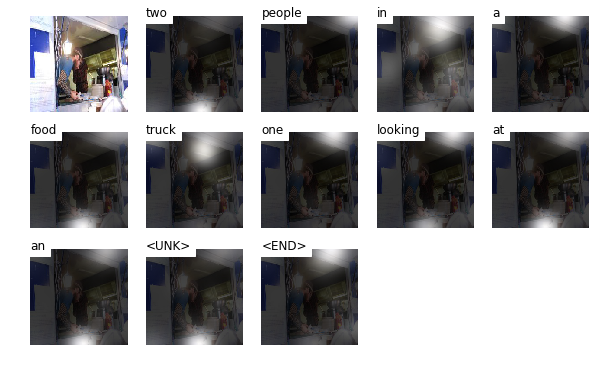

Sampled Caption: close up of a hand touching various pastries <END>


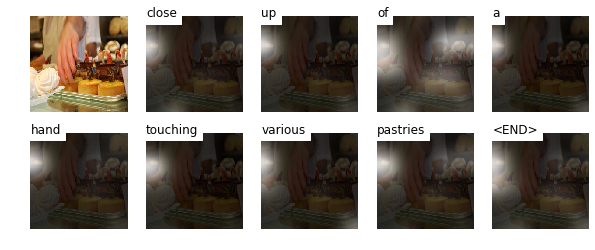

Sampled Caption: a long table with a flower <UNK> in the middle for <UNK> <END>


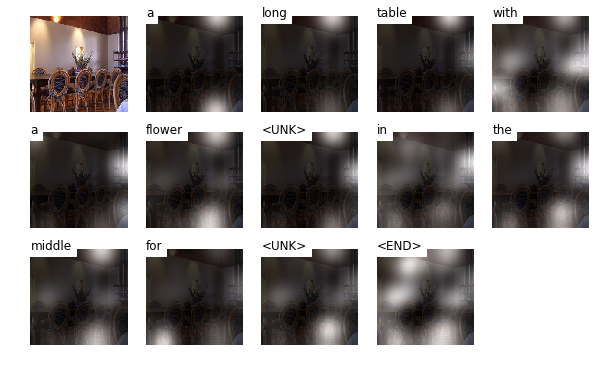

Sampled Caption: a young girl and a woman preparing food in a kitchen <END>


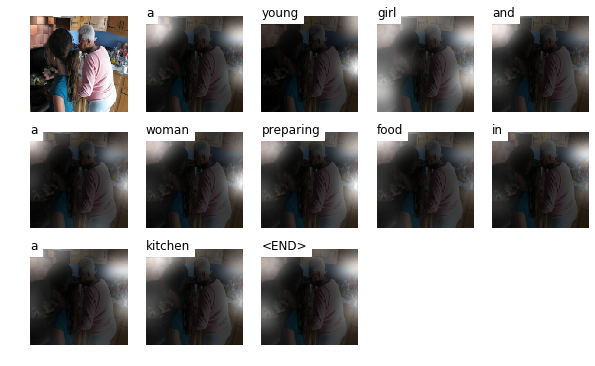

Sampled Caption: <UNK> are preparing food at a restaurant as <UNK> <UNK> <END>


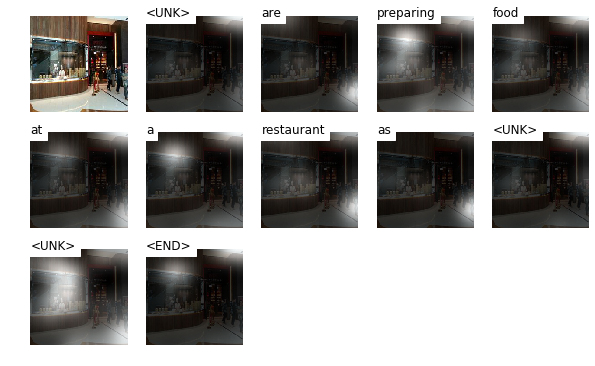

Sampled Caption: a long table with a flower <UNK> in the middle for <UNK> <END>


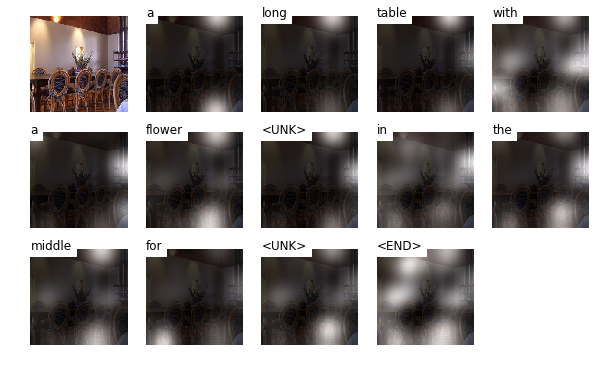

Sampled Caption: a man using a phone in a phone <UNK> <END>


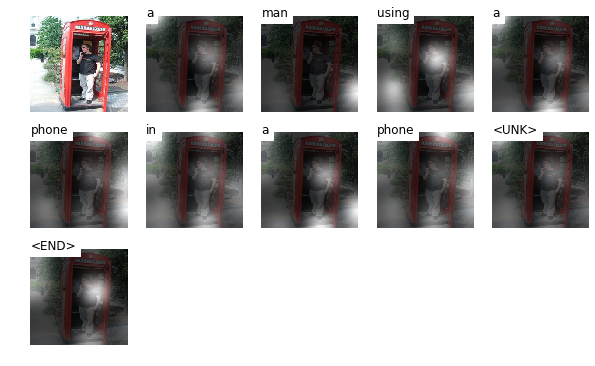

Sampled Caption: a bicycle parked in a kitchen by the stove <END>


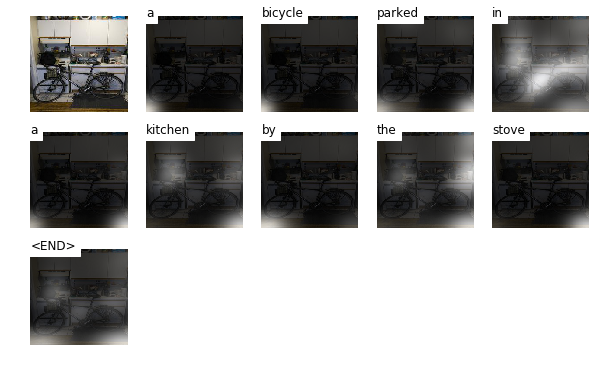

Sampled Caption: a <UNK> dressed man in a door way <END>


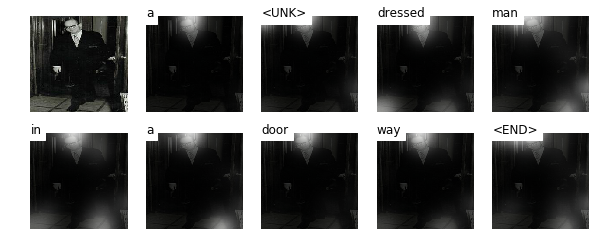

Sampled Caption: people preparing what they <UNK> to eat on a table <END>


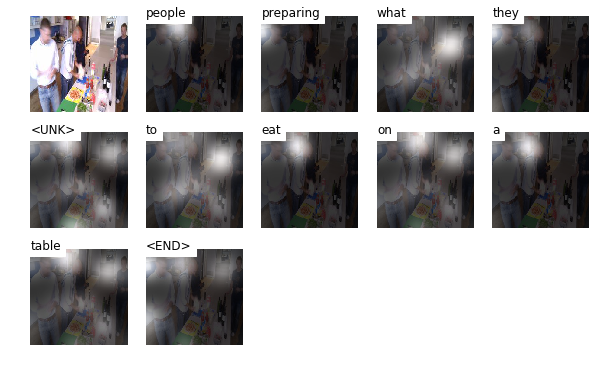

In [16]:
solver.train()

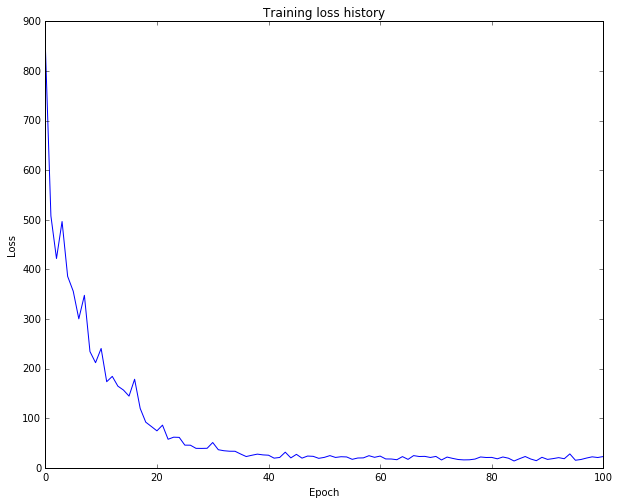

In [17]:
# Plot the training losses
plt.plot(solver.loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training loss history')
plt.show()